Performance Metrics

Graphs and Visualizations

In [87]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [88]:
# Read in data
results_path = "results/experiment_results_final.csv"
assert os.path.exists(results_path), f"File not found: {results_path}"
df = pd.read_csv(results_path)
print(df.shape)
df.head()

(216, 11)


,embedding_model,vector_db,chunk_size,overlap,prep_strategy,query,rag_response,response_time,memory_usage_bytes,total_pipeline_time,llm_model
0,nomic-embed-text,redis,300,0,basic,What is an AVL Tree?,An AVL Tree is an approximately balanced self...,46.795022,3796992,211.118940,mistral
1,nomic-embed-text,redis,300,0,basic,What is the difference between a list where me...,The main difference between a list where memo...,106.202814,3796992,211.118940,mistral
2,nomic-embed-text,redis,300,0,basic,When are linked lists faster than contiguously...,Linked lists are faster for inserting anywher...,44.789537,3796992,211.118940,mistral
3,nomic-embed-text,redis,300,50,basic,What is an AVL Tree?,"An AVL Tree, from the provided context, is ap...",52.075073,1568768,217.894782,mistral
4,nomic-embed-text,redis,300,50,basic,What is the difference between a list where me...,The main difference between a list where memo...,98.937647,1568768,217.894782,mistral


In [89]:
timing_stats_df = df[["response_time", "total_pipeline_time", "memory_usage_bytes"]]
print("GENERAL TIMING STATS")
timing_stats_df.describe()

GENERAL TIMING STATS


,response_time,total_pipeline_time,memory_usage_bytes
count,216.000000,216.000000,2.160000e+02
mean,55.914247,218.066939,4.098253e+07
std,203.643835,369.440591,3.750186e+08
min,4.249140,56.991454,-1.332543e+09
25%,19.570016,111.047017,2.007040e+05
50%,35.846014,152.711300,3.090432e+06
75%,50.518573,195.466215,2.842624e+07
max,2935.368710,3045.278762,9.492357e+08


In [90]:
# Average response times by embedding model
print("Avg Response Time by Embedding Model")
print(df.groupby("embedding_model")["response_time"].mean())

Avg Response Time by Embedding Model
embedding_model
distilroberta-base                                  74.733962
nomic-embed-text                                    39.248283
sentence-transformers/paraphrase-albert-small-v2    53.760496
Name: response_time, dtype: float64


In [91]:
# Average time by db
print("--- Avg Pipeline Time by Vector DB ---")
print(df.groupby("vector_db")["total_pipeline_time"].mean())

--- Avg Pipeline Time by Vector DB ---
vector_db
chroma    166.832077
faiss     130.601589
redis     356.767150
Name: total_pipeline_time, dtype: float64


In [92]:
# Average time by llm
print("--- Avg Response Time by LLM Model ---")
print(df.groupby("llm_model")["total_pipeline_time"].mean())

--- Avg Response Time by LLM Model ---
llm_model
llama      112.672878
mistral    323.461000
Name: total_pipeline_time, dtype: float64


In [93]:
# Average memory usage by chunk size
print("--- Avg Memory Usage by Chunk Size ---")
print(df.groupby("chunk_size")["memory_usage_bytes"].mean())

--- Avg Memory Usage by Chunk Size ---
chunk_size
300    1.373426e+08
500   -5.537758e+07
Name: memory_usage_bytes, dtype: float64


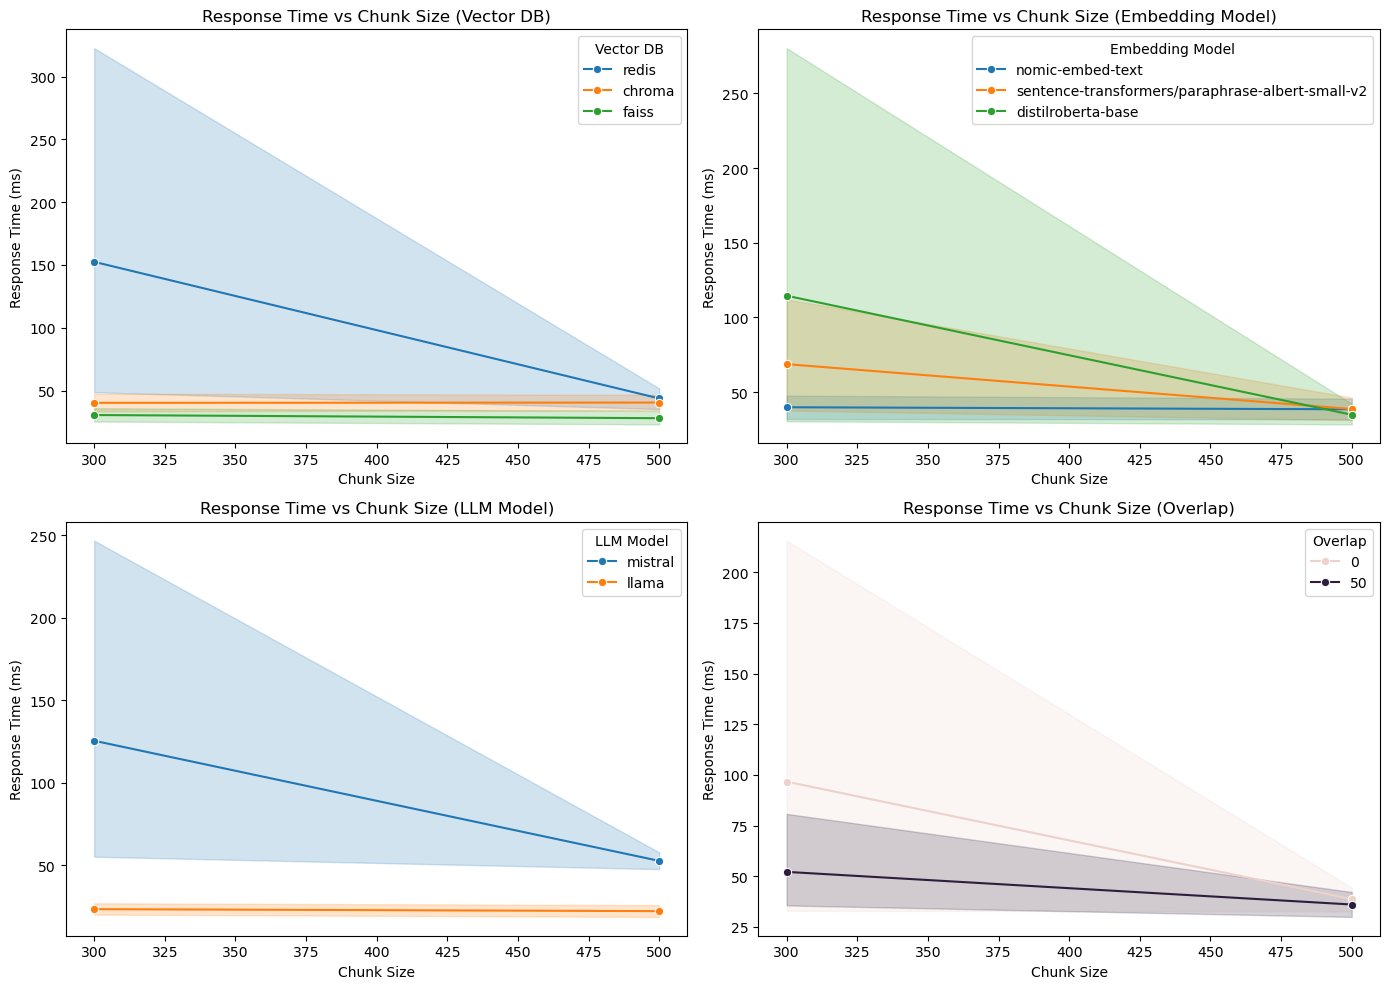

In [94]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define the columns for hue
hue_columns = ["vector_db", "embedding_model", "llm_model", "overlap"]
titles = ["Vector DB", "Embedding Model", "LLM Model", "Overlap"]

# Loop through each subplot and plot
for ax, hue_col, title in zip(axes.flat, hue_columns, titles):
    sns.lineplot(data=df, x="chunk_size", y="response_time", hue=hue_col, marker="o", ax=ax)
    ax.set_title(f"Response Time vs Chunk Size ({title})")
    ax.set_xlabel("Chunk Size")
    ax.set_ylabel("Response Time (ms)")
    ax.legend(title=title)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

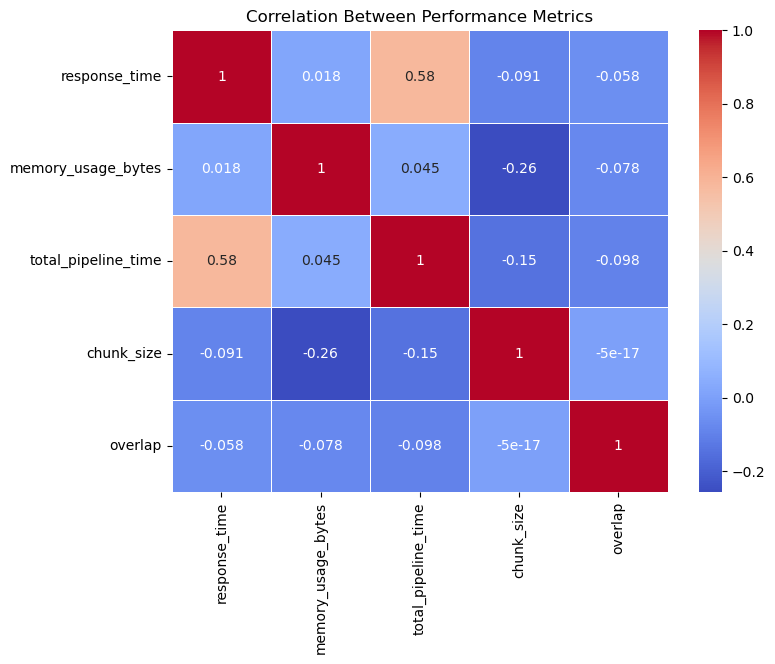

In [95]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[["response_time", "memory_usage_bytes", "total_pipeline_time", "chunk_size", "overlap"]].corr(), 
            annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Between Performance Metrics")
plt.show()

# Vector Database Analysis

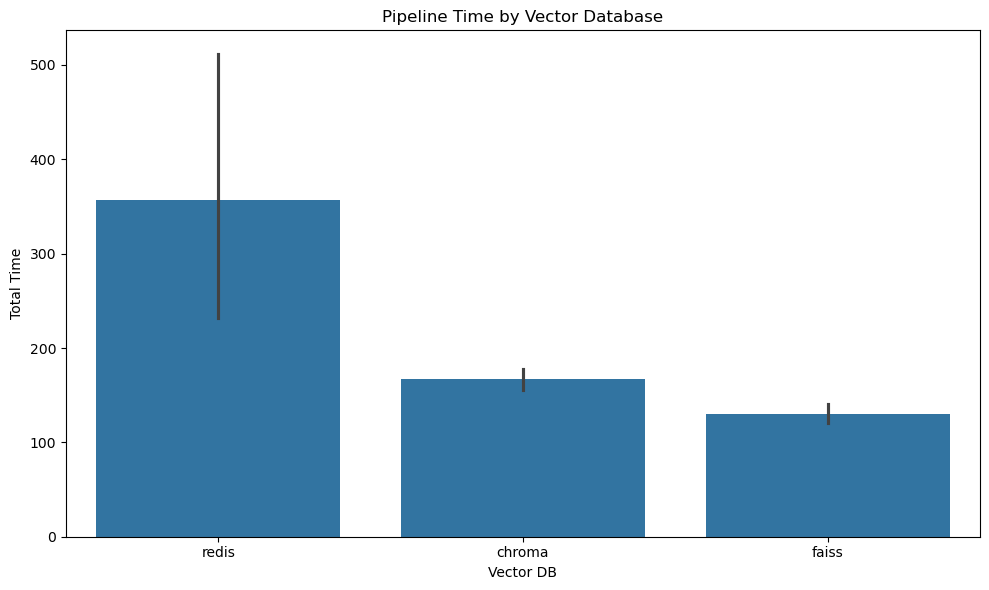

In [96]:
# Total pipeline time by Vector DB
plt.figure(figsize=(10, 6))
sns.barplot(x="vector_db", y="total_pipeline_time", data=df)
plt.title("Pipeline Time by Vector Database")
plt.ylabel("Total Time")
plt.xlabel("Vector DB")
plt.tight_layout()
plt.show()

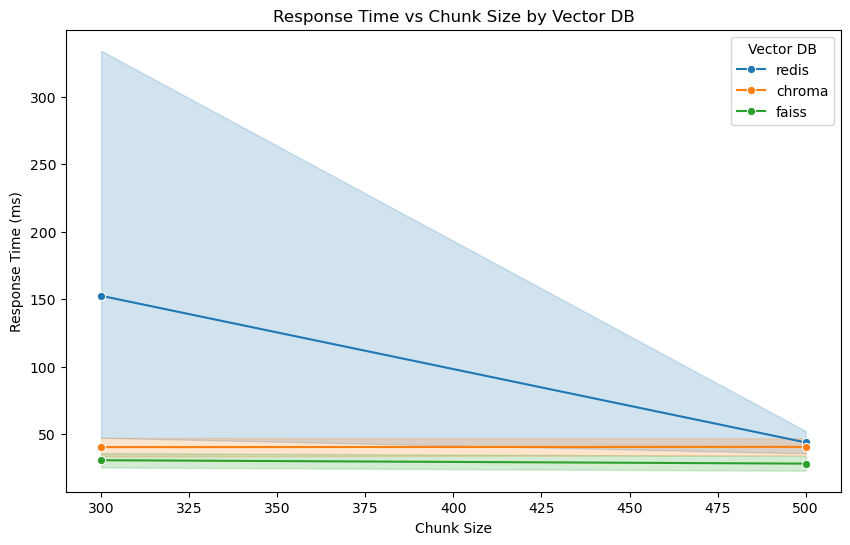

In [97]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="chunk_size", y="response_time", hue="vector_db", marker="o")

plt.xlabel("Chunk Size")
plt.ylabel("Response Time (ms)")
plt.title("Response Time vs Chunk Size by Vector DB")
plt.legend(title="Vector DB")
plt.show()


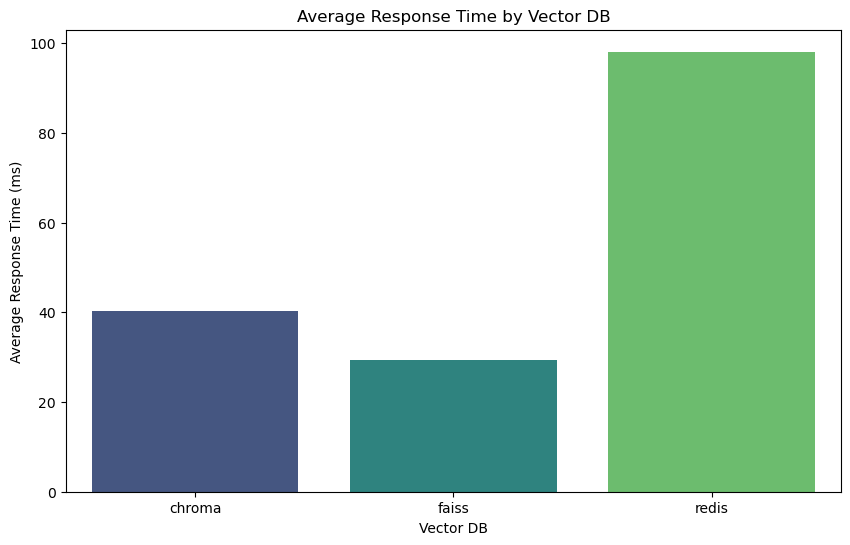

In [98]:
avg_response_time = df.groupby("vector_db")["response_time"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_response_time, x="vector_db", y="response_time", hue="vector_db", palette="viridis")

plt.xlabel("Vector DB")
plt.ylabel("Average Response Time (ms)")
plt.title("Average Response Time by Vector DB")
plt.show()


## Embedding Models, LLM Models, and Vector DBs Response Time Analysis

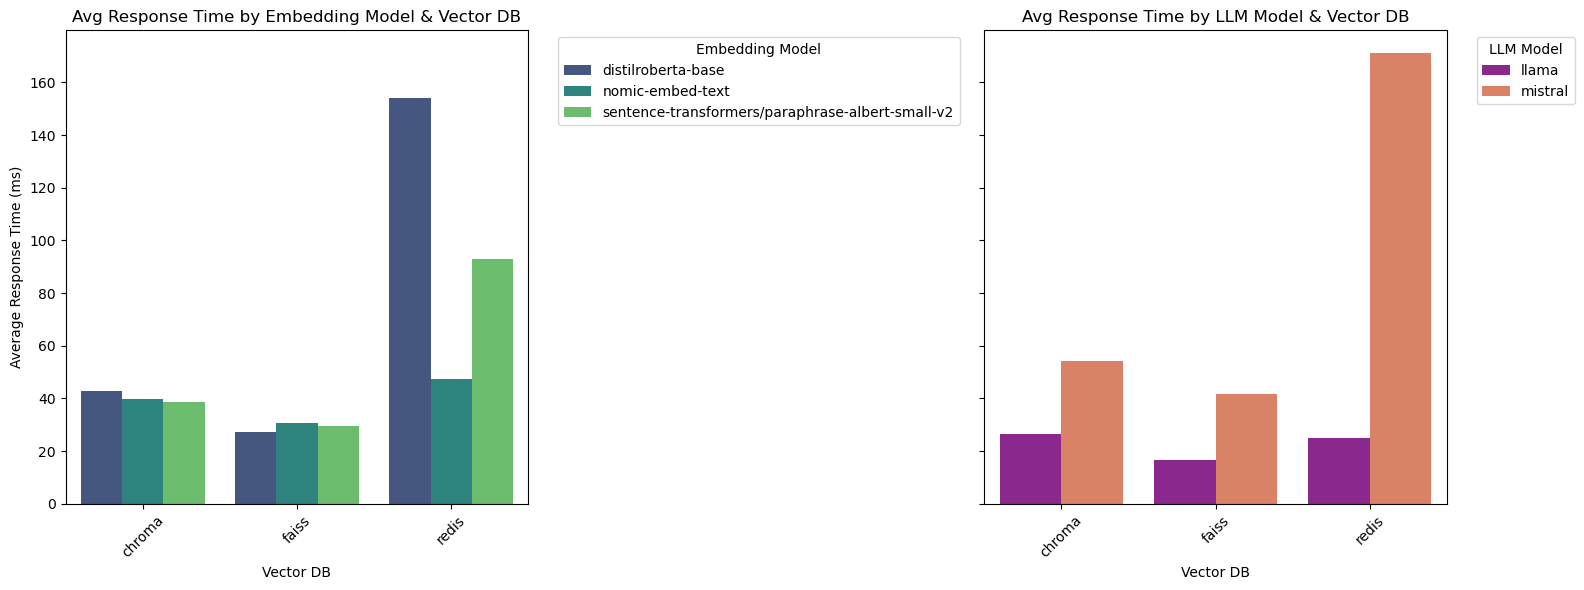

In [99]:
# Compute average response time for embedding model & vector DB
avg_response_time_embed = df.groupby(["embedding_model", "vector_db"])["response_time"].mean().reset_index()

# Compute average response time for LLM model & vector DB
avg_response_time_llm = df.groupby(["llm_model", "vector_db"])["response_time"].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Bar plot for embedding models
sns.barplot(data=avg_response_time_embed, x="vector_db", y="response_time", hue="embedding_model", palette="viridis", ax=axes[0])
axes[0].set_xlabel("Vector DB")
axes[0].set_ylabel("Average Response Time (ms)")
axes[0].set_title("Avg Response Time by Embedding Model & Vector DB")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Embedding Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Bar plot for LLM models
sns.barplot(data=avg_response_time_llm, x="vector_db", y="response_time", hue="llm_model", palette="plasma", ax=axes[1])
axes[1].set_xlabel("Vector DB")
axes[1].set_title("Avg Response Time by LLM Model & Vector DB")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="LLM Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

## Chunk Size, Vector DBs, and Embedding Models Analysis

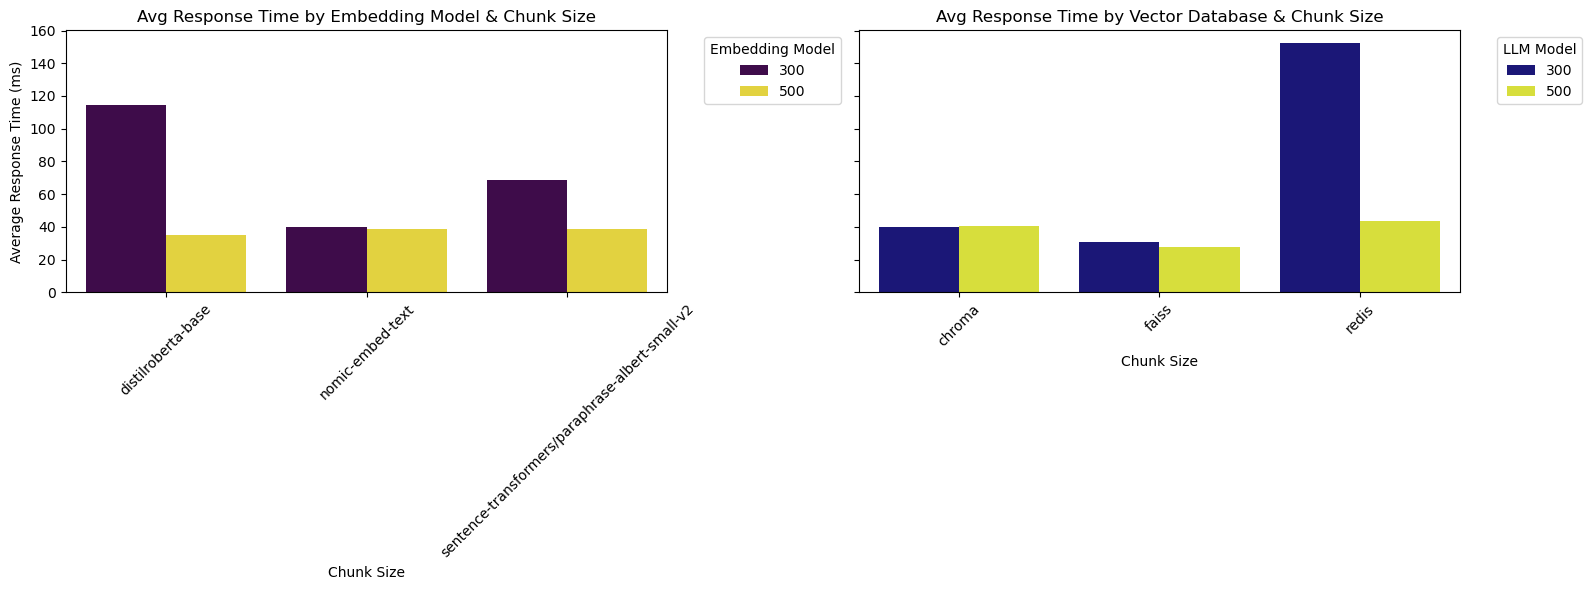

In [100]:
# Compute average response time for embedding model & vector DB
avg_response_vec = df.groupby(["chunk_size", "vector_db"])["response_time"].mean().reset_index()

# Compute average response time for LLM model & vector DB
avg_response_emb = df.groupby(["chunk_size", "embedding_model"])["response_time"].mean().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Bar plot for embedding models
sns.barplot(data=avg_response_emb, x="embedding_model", y="response_time", hue="chunk_size", palette="viridis", ax=axes[0])
axes[0].set_xlabel("Chunk Size")
axes[0].set_ylabel("Average Response Time (ms)")
axes[0].set_title("Avg Response Time by Embedding Model & Chunk Size")
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title="Embedding Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Bar plot for LLM models
sns.barplot(data=avg_response_vec, x="vector_db", y="response_time", hue="chunk_size", palette="plasma", ax=axes[1])
axes[1].set_xlabel("Chunk Size")
axes[1].set_title("Avg Response Time by Vector Database & Chunk Size")
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title="LLM Model", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

# Embedding Model Analytics

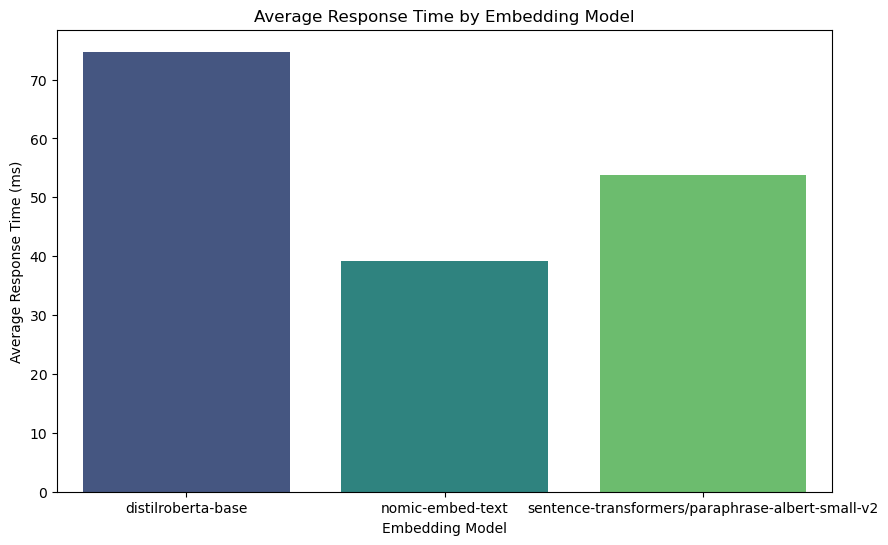

In [101]:
avg_response_time = df.groupby("embedding_model")["response_time"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_response_time, x="embedding_model", y="response_time", hue="embedding_model", palette="viridis")

plt.xlabel("Embedding Model")
plt.ylabel("Average Response Time (ms)")
plt.title("Average Response Time by Embedding Model")
plt.show()

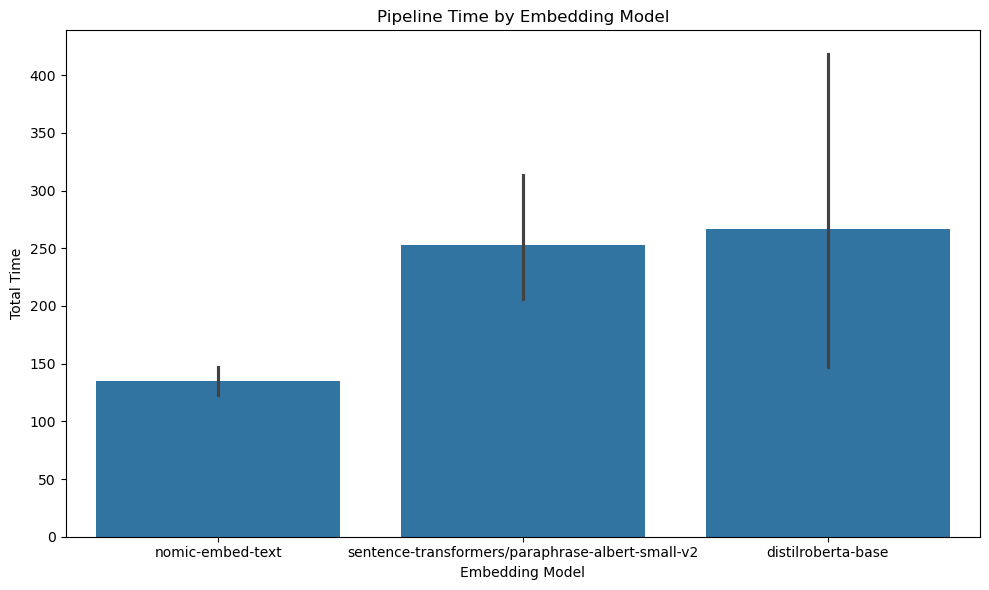

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(x="embedding_model", y="total_pipeline_time", data=df)
plt.title("Pipeline Time by Embedding Model")
plt.ylabel("Total Time")
plt.xlabel("Embedding Model")
plt.tight_layout()
plt.show()

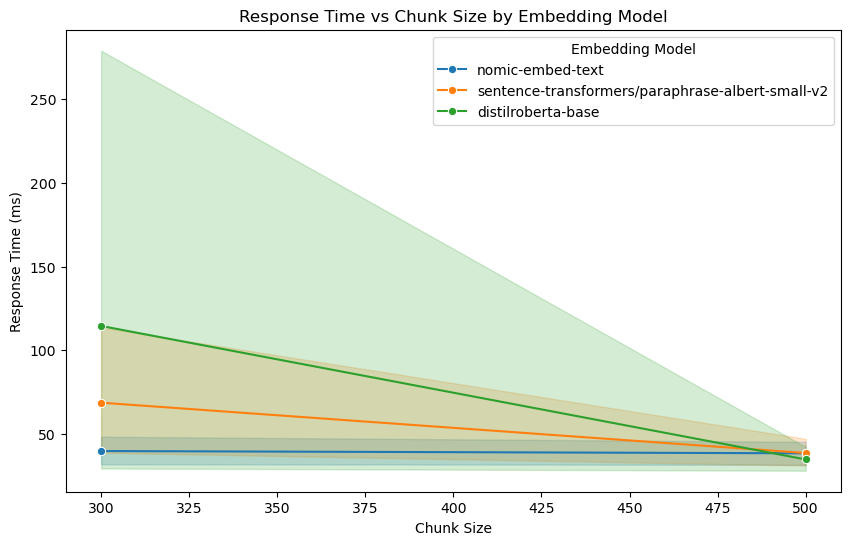

In [103]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="chunk_size", y="response_time", hue="embedding_model", marker="o")

plt.xlabel("Chunk Size")
plt.ylabel("Response Time (ms)")
plt.title("Response Time vs Chunk Size by Embedding Model")
plt.legend(title="Embedding Model")
plt.show()


# LLM Model Analytics

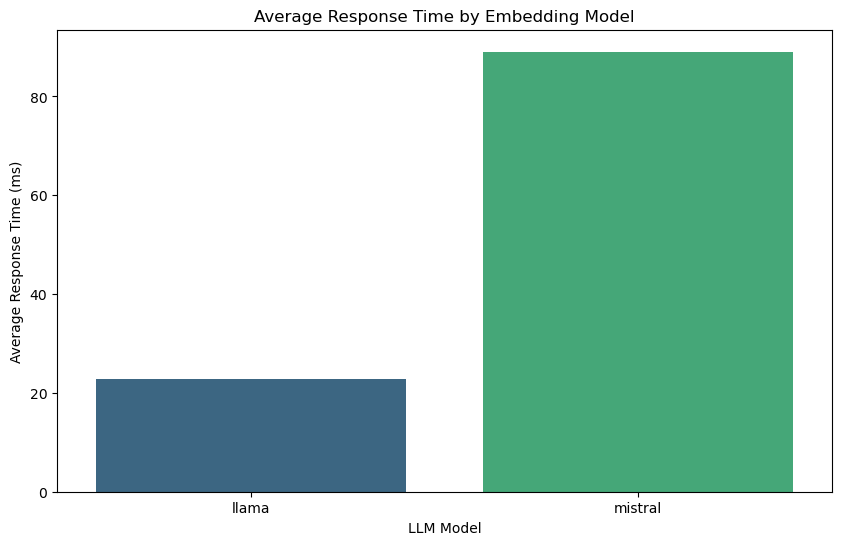

In [104]:
avg_response_time = df.groupby("llm_model")["response_time"].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_response_time, x="llm_model", y="response_time", hue="llm_model", palette="viridis")

plt.xlabel("LLM Model")
plt.ylabel("Average Response Time (ms)")
plt.title("Average Response Time by Embedding Model")
plt.show()

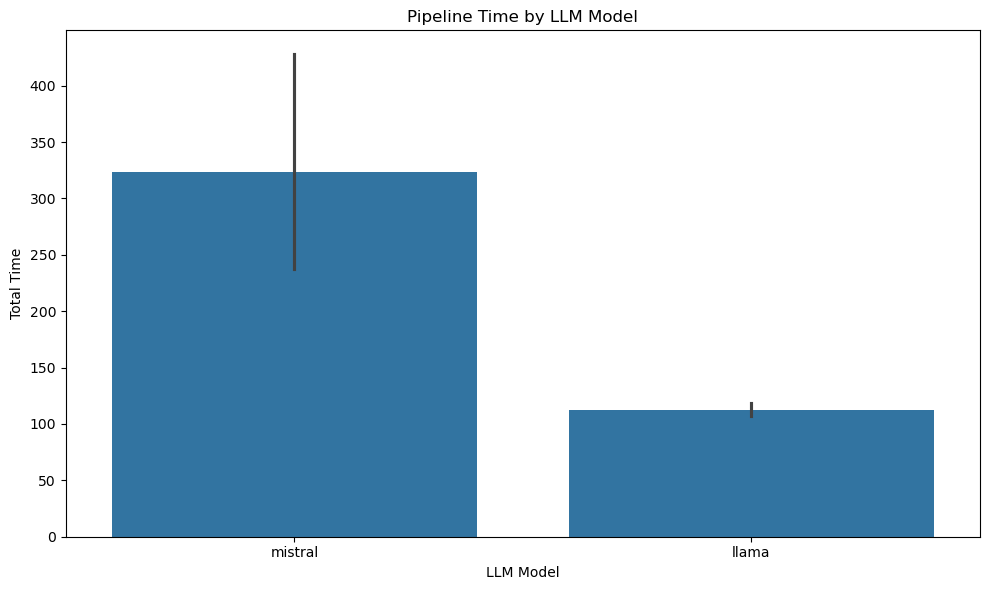

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(x="llm_model", y="total_pipeline_time", data=df)
plt.title("Pipeline Time by LLM Model")
plt.ylabel("Total Time")
plt.xlabel("LLM Model")
plt.tight_layout()
plt.show()

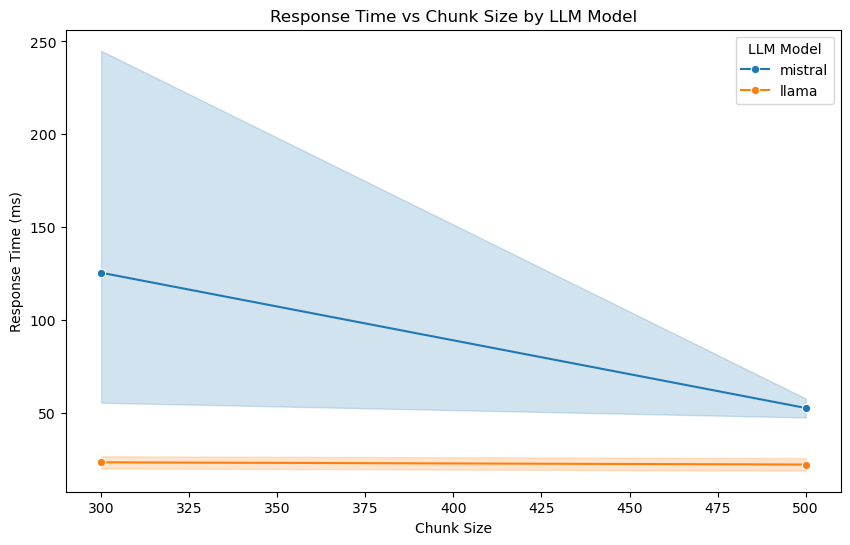

In [106]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="chunk_size", y="response_time", hue="llm_model", marker="o")

plt.xlabel("Chunk Size")
plt.ylabel("Response Time (ms)")
plt.title("Response Time vs Chunk Size by LLM Model")
plt.legend(title="LLM Model")
plt.show()

# Final Recommendation Analysis

In [107]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant columns
columns_to_optimize = ["response_time", "memory_usage_bytes", "total_pipeline_time"]
scaler = MinMaxScaler()

# Normalize metrics (0 = best, 1 = worst)
df_normalized = df.copy()
df_normalized[columns_to_optimize] = scaler.fit_transform(df[columns_to_optimize])

# Compute an overall score (weighted sum)
df_normalized["overall_score"] = df_normalized["response_time"] * 0.4 + \
                                  df_normalized["memory_usage_bytes"] * 0.3 + \
                                  df_normalized["total_pipeline_time"] * 0.3

# Sort by best configurations
#best_configs = df_normalized.sort_values(by="overall_score")
#best_configs[["chunk_size", "embedding_model", "llm_model", "vector_db", "overlap", "overall_score"]].head(10)
df


,embedding_model,vector_db,chunk_size,overlap,prep_strategy,query,rag_response,response_time,memory_usage_bytes,total_pipeline_time,llm_model
0,nomic-embed-text,redis,300,0,basic,What is an AVL Tree?,An AVL Tree is an approximately balanced self...,46.795022,3796992,211.118940,mistral
1,nomic-embed-text,redis,300,0,basic,What is the difference between a list where me...,The main difference between a list where memo...,106.202814,3796992,211.118940,mistral
2,nomic-embed-text,redis,300,0,basic,When are linked lists faster than contiguously...,Linked lists are faster for inserting anywher...,44.789537,3796992,211.118940,mistral
3,nomic-embed-text,redis,300,50,basic,What is an AVL Tree?,"An AVL Tree, from the provided context, is ap...",52.075073,1568768,217.894782,mistral
4,nomic-embed-text,redis,300,50,basic,What is the difference between a list where me...,The main difference between a list where memo...,98.937647,1568768,217.894782,mistral
...,...,...,...,...,...,...,...,...,...,...,...
211,distilroberta-base,faiss,500,0,basic,What is the difference between a list where me...,"In a contiguous list, all n records are stored...",19.767773,2330624,80.861047,llama
212,distilroberta-base,faiss,500,0,basic,When are linked lists faster than contiguously...,Linked lists are faster for inserting anywhere...,5.141888,2330624,80.861047,llama
213,distilroberta-base,faiss,500,50,basic,What is an AVL Tree?,An AVL (Adelson-Velskii and Landis) Tree is a ...,10.815318,101376000,69.456590,llama
214,distilroberta-base,faiss,500,50,basic,What is the difference between a list where me...,A List where memory is Contiguously Allocated ...,15.210127,101376000,69.456590,llama
